In [ ]:
pip install sklearn-contrib-py-earth

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [5]:
import pandas_profiling as pp
import pyearth

In [166]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
#pd.show_versions()

In [150]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb/Listings_Final.csv')

In [152]:
df1['Posting_Date'] = df1['Posting_Date'].astype('datetime64[ns]')

In [ ]:
#pp.ProfileReport(df1)

In [ ]:
df1.dtypes

In [153]:
#ref_date = pd.Timestamp(df1['Posting_Date'].max())
ref_date = pd.Timestamp(dt.date(2019,8,31))
print(ref_date)

2019-08-31 00:00:00


In [154]:
df1['Posting_Year'] = df1['Posting_Date'].dt.year

In [155]:
df1['Posting_Month'] = df1['Posting_Date'].dt.month

In [156]:
df1['Posting_Age'] = round((ref_date - df1['Posting_Date']).dt.days/365,2)

In [157]:
df1['Superhost'] = df1['Host_Type'].map(lambda x: 0 if x=="Regular" else 1)

In [143]:
df1.head(10)

,Listing_Id,Posting_Date,Posting_Time,Location,Images,Bookings,Host_Type,Posting_Year,Posting_Month,Posting_Age,Superhost
0,4955430,2019-05-13,20:18:13,San Francisco,31,10,Regular,2019,5,0.30,0
1,3338094,2016-01-04,5:30:37,Amsterdam,6,48,Regular,2016,1,3.66,0
2,3132720,2018-12-24,12:26:15,Barcelona,25,10,Regular,2018,12,0.68,0
3,3196344,2014-10-14,15:09:27,Berlin,10,134,Superhost,2014,10,4.88,1
4,4588846,2016-07-21,9:26:48,Brussels,4,7,Regular,2016,7,3.11,0
5,4677052,2016-05-14,6:40:39,Kyoto,3,5,Regular,2016,5,3.30,0
6,3485608,2016-04-04,10:30:15,Madrid,7,44,Regular,2016,4,3.41,0
7,4980709,2017-04-03,9:44:58,Tokyo,12,52,Regular,2017,4,2.41,0
8,4761153,2018-01-14,15:44:54,Los Angeles,28,81,Superhost,2018,1,1.63,1
9,4991055,2017-08-09,10:26:32,Seattle,14,109,Regular,2017,8,2.06,0


In [158]:
df1x = df1[['Images','Superhost','Posting_Age','Bookings']]

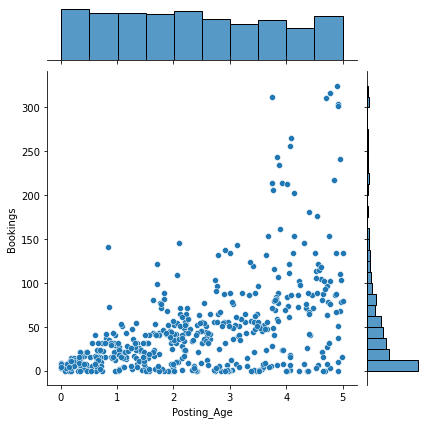

In [146]:
sns.jointplot(x="Posting_Age",y="Bookings",data=df1x)

In [148]:
stats.pearsonr(df1x[df1x['Superhost']==0]['Posting_Age'],df1x[df1x['Superhost']==0]['Bookings'])

(0.5107301982934805, 5.3252126292700915e-31)

In [159]:
df1x['Bookingsrate'] = df1x['Bookings']/df1x['Posting_Age']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df1x.head()

,Images,Superhost,Posting_Age,Bookings,Bookingsrate
0,31,0,0.30,10,33.333333
1,6,0,3.66,48,13.114754
2,25,0,0.68,10,14.705882
3,10,1,4.88,134,27.459016
4,4,0,3.11,7,2.250804


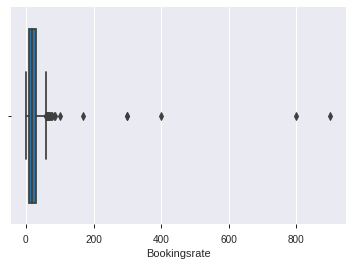

In [74]:
sns.boxplot(x=df1x['Bookingsrate'])

Bookingsrate >=100 are outliers. Total 6 rows dropped from analysis.

In [160]:
df1z = df1x.drop(df1x[df1x['Bookingsrate']>=100].index)

In [161]:
df1z.sort_values('Bookingsrate',axis=0,ascending=False,inplace=False).head(10)

,Images,Superhost,Posting_Age,Bookings,Bookingsrate
399,23,0,0.85,73,85.882353
333,11,1,3.75,312,83.200000
325,21,0,0.09,7,77.777778
144,22,0,0.19,14,73.684211
425,22,0,0.11,8,72.727273
463,19,1,1.71,121,70.760234
497,15,1,2.10,145,69.047619
197,25,0,0.61,41,67.213115
53,26,0,0.15,10,66.666667
86,21,0,0.18,12,66.666667


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


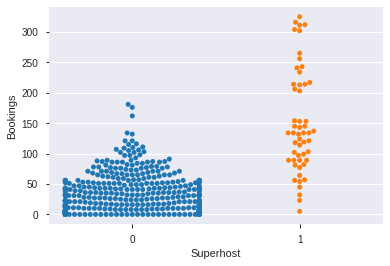

In [79]:
sns.swarmplot(x="Superhost",y="Bookings",data=df1z)

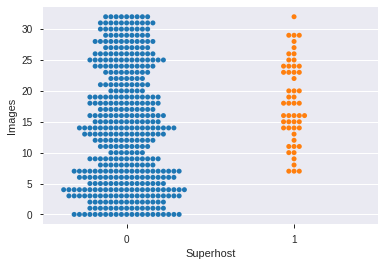

In [205]:
sns.swarmplot(x="Superhost",y="Images",data=df1z)

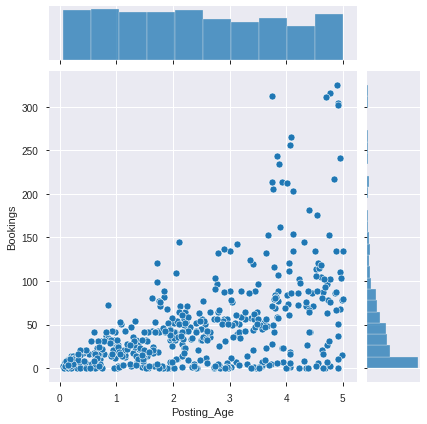

In [80]:
sns.jointplot(x="Posting_Age",y="Bookings",data=df1z)

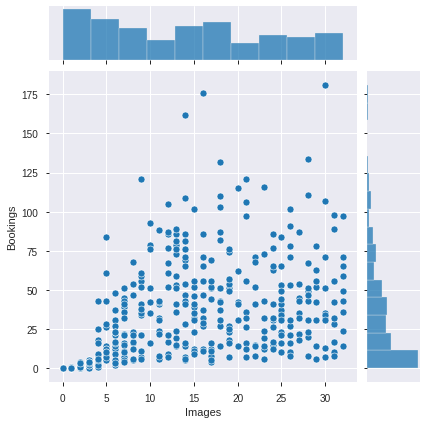

In [227]:
sns.jointplot(x="Images",y="Bookings",data=df1z[df1z['Superhost']==0])

In [230]:
stats.shapiro(df1z[df1z['Superhost']==0]['Bookings'])

(0.8792906403541565, 4.8559377298032535e-18)

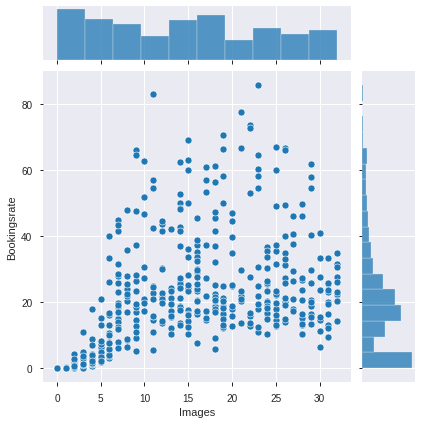

In [84]:
sns.jointplot(x="Images",y="Bookingsrate",data=df1z)

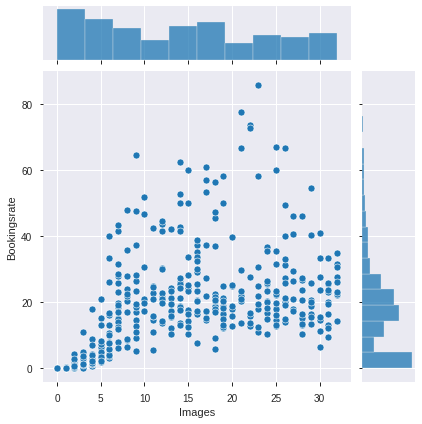

In [207]:
sns.jointplot(x="Images",y="Bookingsrate",data=df1z[df1z['Superhost']==0])

In [232]:
stats.shapiro(df1z[df1z['Superhost']==0]['Bookingsrate'])

(0.9015510082244873, 2.980104636319576e-16)

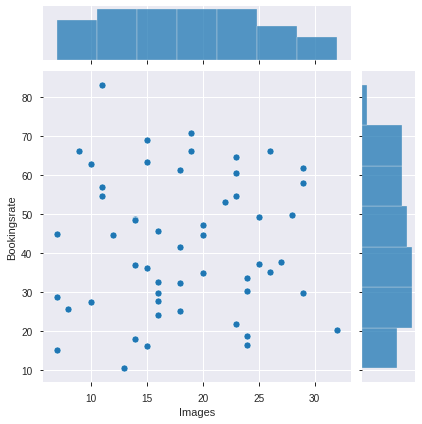

In [208]:
sns.jointplot(x="Images",y="Bookingsrate",data=df1z[df1z['Superhost']==1])

In [212]:
stats.pearsonr(df1z[df1z['Superhost']==0]['Images'],df1z[df1z['Superhost']==0]['Bookingsrate'])

(0.5030562743502193, 1.3345333841524666e-29)

In [210]:
stats.pearsonr(df1z[df1z['Superhost']==1]['Images'],df1z[df1z['Superhost']==1]['Bookingsrate'])

(0.012891768060069144, 0.9270005302278053)

Above Pearson Correlation coefficient is insignificant (p-value 0.92). Hence, no correlation between Superhost & BookingsRate.

In [162]:
df1regu = df1z[df1z['Superhost']==0]
df1regu = df1regu.drop(['Superhost'],axis=1).reset_index(drop=True)

In [160]:
model1 = LinearRegression()

In [218]:
model1.fit(df1regu[['Images']].to_numpy(),df1regu[['Bookingsrate']].to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
model1.coef_

array([[0.81800149]])

In [220]:
model1.score(df1regu[['Images']].to_numpy(),df1regu[['Bookingsrate']].to_numpy())

0.2530656151631232

In [163]:
df1regu['Lograte'] = np.log2(df1regu['Bookingsrate'])
df1regu['Lograte'] = df1regu['Lograte'].map(lambda x: 0 if (x<0) else x)
#df1regu['Lograte'] = df1regu['Lograte'].map(lambda x: -(1/x) if (x<=-1) else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


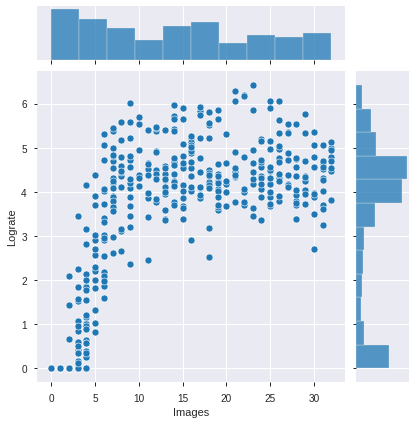

In [229]:
sns.jointplot(x="Images",y="Lograte",data=df1regu)

In [233]:
stats.shapiro(df1regu['Lograte'])

(0.8612871170043945, 2.5618137707467016e-19)

In [164]:
df1grp = df1regu.groupby(['Images'],sort=True)['Bookingsrate'].mean().reset_index(drop=True)

In [165]:
df1grp.head()

0    0.000000
1    0.018939
2    0.873979
3    2.002965
4    3.359659
Name: Bookingsrate, dtype: float64

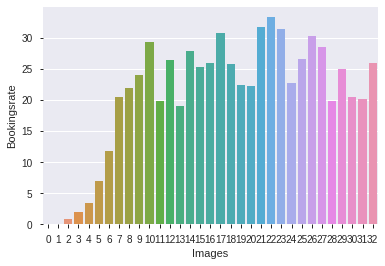

In [226]:
sns.barplot(x="Images",y="Bookingsrate",data=df1grp)

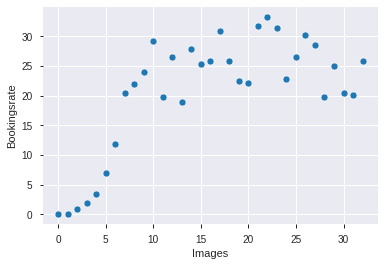

In [238]:
sns.scatterplot(x="Images",y="Bookingsrate",data=df1grp)

In [239]:
model2 = pyearth.Earth(max_degree=3,max_terms=10)

In [241]:
model2.fit(df1regu[['Images']].to_numpy(),df1regu[['Lograte']].to_numpy())

/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
      enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
      fast_h=None, feature_importance_type=None, max_degree=3, max_terms=10,
      min_search_points=None, minspan=None, minspan_alpha=None, penalty=None,
      smooth=None, thresh=None, use_fast=None, verbose=0, zero_tol=None)

In [242]:
model2.summary()

'Earth Model\n-------------------------------------\nBasis Function  Pruned  Coefficient  \n-------------------------------------\n(Intercept)     No      -0.69103     \nx0              No      0.814204     \nx0*x0           No      -0.0391386   \nx0*x0*x0        No      0.000588678  \nh(x0-0)*x0*x0   Yes     None         \nh(0-x0)*x0*x0   Yes     None         \nh(x0-0)*x0      Yes     None         \nh(0-x0)*x0      Yes     None         \n-------------------------------------\nMSE: 0.6982, GCV: 0.7260, RSQ: 0.7838, GRSQ: 0.7762'

In [162]:
model3 = pyearth.Earth(max_degree=2,max_terms=3)

In [163]:
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model3,df1z[['Images','Superhost']].to_numpy(),df1z[['Lograte']].to_numpy(),
                           scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [168]:
model3.fit(df1z[['Images','Superhost']].to_numpy(),df1z[['Lograte']].to_numpy())

/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/dist-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
      enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
      fast_h=None, feature_importance_type=None, max_degree=2, max_terms=3,
      min_search_points=None, minspan=None, minspan_alpha=None, penalty=None,
      smooth=None, thresh=None, use_fast=None, verbose=0, zero_tol=None)

In [173]:
model3.score(df1z[['Images','Superhost']].to_numpy(),df1z[['Lograte']].to_numpy())

0.7416846250979532

In [169]:
print('MAE: ',(n_scores))

MAE:  [-0.79234172 -0.70625831 -0.7446178  -0.78254929 -0.77364443 -0.66203135
 -0.748237   -0.66640911 -0.79545885]


In [264]:
 model4 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                    ('linear', LinearRegression(fit_intercept=False))])

In [265]:
model4.fit(df1regu[['Images']].to_numpy(),df1regu[['Lograte']].to_numpy())

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [266]:
model4.named_steps['linear'].coef_

array([[-6.91029663e-01,  8.14203667e-01, -3.91386343e-02,
         5.88677560e-04]])

In [267]:
model4.score(df1regu[['Images']].to_numpy(),df1regu[['Lograte']].to_numpy())

0.7837941248243421

In [167]:
df1regu['Imagegrp'] = ""
for i in range(len(df1regu)):
  if (df1regu.loc[i,'Images']>=0) and (df1regu.loc[i,'Images']<=2):
    df1regu.loc[i,'Imagegrp'] = "0-2"
  elif (df1regu.loc[i,'Images']>=3) and (df1regu.loc[i,'Images']<=9):
    df1regu.loc[i,'Imagegrp'] = "3-9"
  elif (df1regu.loc[i,'Images']>=10) and (df1regu.loc[i,'Images']<=23):
    df1regu.loc[i,'Imagegrp'] = "10-23"
  elif (df1regu.loc[i,'Images']>=24):
    df1regu.loc[i,'Imagegrp'] = "24plus"

In [168]:
df1regu['Imagegrp2'] = ""
for i in range(len(df1regu)):
  if (df1regu.loc[i,'Images']>=0) and (df1regu.loc[i,'Images']<=2):
    df1regu.loc[i,'Imagegrp2'] = "0-2"
  elif (df1regu.loc[i,'Images']>=3) and (df1regu.loc[i,'Images']<=10):
    df1regu.loc[i,'Imagegrp2'] = "3-10"
  elif (df1regu.loc[i,'Images']>=11) and (df1regu.loc[i,'Images']<=17):
    df1regu.loc[i,'Imagegrp2'] = "11-17"
  elif (df1regu.loc[i,'Images']>=18) and (df1regu.loc[i,'Images']<=23):
    df1regu.loc[i,'Imagegrp2'] = "18-23"
  elif (df1regu.loc[i,'Images']>=24):
    df1regu.loc[i,'Imagegrp2'] = "24plus"

In [169]:
df1regu.tail(10)

,Images,Posting_Age,Bookings,Bookingsrate,Lograte,Imagegrp,Imagegrp2
430,0,0.54,0,0.000000,0.000000,0-2,0-2
431,4,2.61,6,2.298851,1.200913,3-9,3-10
432,3,1.12,4,3.571429,1.836501,3-9,3-10
433,7,0.14,4,28.571429,4.836501,3-9,3-10
434,17,0.93,16,17.204301,4.104697,10-23,11-17
435,7,2.40,41,17.083333,4.094518,3-9,3-10
436,21,1.24,26,20.967742,4.390100,10-23,18-23
437,6,2.19,17,7.762557,2.956532,3-9,3-10
438,21,4.05,121,29.876543,4.900941,10-23,18-23
439,32,0.69,24,34.782609,5.120294,24plus,24plus


In [170]:
df1dum = pd.get_dummies(df1regu,prefix_sep='_')

In [47]:
df1dum.head()

,Images,Posting_Age,Bookings,Bookingsrate,Lograte,Imagegrp_0-2,Imagegrp_10-23,Imagegrp_24plus,Imagegrp_3-9,Imagegrp2_0-2,Imagegrp2_11-17,Imagegrp2_18-23,Imagegrp2_24plus,Imagegrp2_3-10
0,31,0.30,10,33.333333,5.058894,0,0,1,0,0,0,0,1,0
1,6,3.66,48,13.114754,3.713119,0,0,0,1,0,0,0,0,1
2,25,0.68,10,14.705882,3.878321,0,0,1,0,0,0,0,1,0
3,4,3.11,7,2.250804,1.170440,0,0,0,1,0,0,0,0,1
4,3,3.30,5,1.515152,0.599462,0,0,0,1,0,0,0,0,1


In [46]:
model5 = LinearRegression()
model5.fit(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Bookingsrate']].to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model5.coef_

array([[ 0.84510142, -5.41427416,  1.89339419,  7.48463928, -3.96375931]])

In [48]:
model5.score(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Bookingsrate']].to_numpy())

0.35829339771629654

In [171]:
df1dum['Lograte'] = np.log2(df1dum['Bookingsrate'])
df1dum['Lograte'] = df1dum['Lograte'].map(lambda x: 0 if (x<0) else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


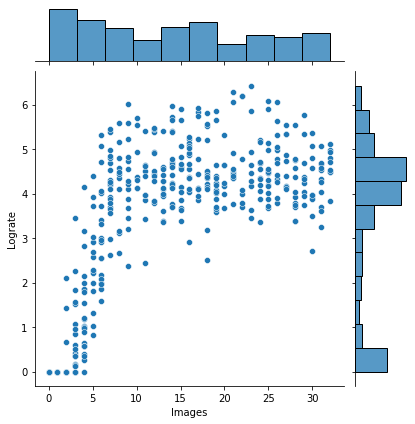

In [30]:
sns.jointplot(x="Images",y="Lograte",data=df1dum)

In [51]:
model6 = LinearRegression()
model6.fit(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model6.coef_

array([[ 0.10500824, -1.62171589,  0.48589891,  1.19571571, -0.05989873]])

In [53]:
model6.score(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())

0.6836333283530822

In [31]:
model7 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))])

In [32]:
model7.fit(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
model7.named_steps['linear'].coef_

array([[ 0.98280306,  0.20596868, -0.50913836, -1.10483418,  1.34206509,
         1.25471051, -0.00220131, -0.06896747,  0.50121272, -0.11684138,
        -0.10943519, -0.50913836,  0.        ,  0.        ,  0.        ,
        -1.10483418,  0.        ,  0.        ,  1.34206509,  0.        ,
         1.25471051]])

In [34]:
model7.score(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())

0.8172155373376646

In [ ]:
model7.named_steps['poly'].get_feature_names()

In [172]:
dfinput = df1regu[['Images','Imagegrp','Imagegrp2']]
dfinput = dfinput.drop_duplicates().reset_index(drop=True)
dfinput = pd.get_dummies(dfinput,prefix_sep='_')
dfinput.sort_values('Images',axis=0,ascending=True,inplace=True)
dfinput = dfinput.reset_index(drop=True)

In [43]:
#model7.predict(df1dum[['Images','Imagegrp_0-2','Imagegrp_3-9','Imagegrp_10-23','Imagegrp_24plus']].to_numpy())
model7.predict(inp1)

array([[0.09932624],
       [0.87486712],
       [2.25400897],
       [3.61554034],
       [4.95946123],
       [4.3380753 ],
       [4.41947228],
       [4.5459189 ],
       [4.55236841],
       [4.52974291],
       [4.40705024]])

In [184]:
predictors = ['Images','Imagegrp2_0-2','Imagegrp2_3-10','Imagegrp2_11-17','Imagegrp2_18-23','Imagegrp2_24plus']
target = ['Lograte']
x1 = df1dum[predictors].values
y1 = df1dum[target].values
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.35,random_state=1)

In [216]:
predictors = ['Images']
target = ['Lograte']
x2 = df1dum[predictors].values
y2 = df1dum[target].values
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.45,random_state=1)

In [185]:
model8 = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))])

In [186]:
#model8.fit(df1dum[['Images','Imagegrp2_0-2','Imagegrp2_3-10','Imagegrp2_11-17','Imagegrp2_18-23','Imagegrp2_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())
model8.fit(x1_train,y1_train.ravel())
predict_train8 = model8.predict(x1_train)
predict_test8 = model8.predict(x1_test)

In [187]:
#model8.score(df1dum[['Images','Imagegrp2_0-2','Imagegrp2_3-10','Imagegrp2_11-17','Imagegrp2_18-23','Imagegrp2_24plus']].to_numpy(),df1dum[['Lograte']].to_numpy())
print(model8.score(x1_train,y1_train))
print(model8.score(x1_test,y1_test))

0.819481367914059
0.8138601511602203


In [188]:
#inp2=[[1,1,0,0,0,0],[3,0,1,0,0,0],[5,0,1,0,0,0],[7,0,1,0,0,0],[9,0,1,0,0,0],[10,0,1,0,0,0],[12,0,0,1,0,0],[17,0,0,1,0,0],[23,0,0,0,1,0],[25,0,0,0,0,1],[30,0,0,0,0,1]]
#model8.predict(inp2)
y8 = model8.predict(dfinput[['Images','Imagegrp2_0-2','Imagegrp2_3-10','Imagegrp2_11-17','Imagegrp2_18-23','Imagegrp2_24plus']].to_numpy())

In [99]:
model9 = DecisionTreeRegressor(max_depth=6)

In [217]:
#model9.fit(df1dum[['Images']].to_numpy(),df1dum[['Lograte']].to_numpy())
model9.fit(x2_train,y2_train.ravel())
predict_train9 = model9.predict(x2_train)
predict_test9 = model9.predict(x2_test)

In [218]:
#model9.score(df1dum[['Images']].to_numpy(),df1dum[['Lograte']].to_numpy())
print(model9.score(x2_train,y2_train))
print(model9.score(x2_test,y2_test))

0.8382213594928913
0.8204440368051266


In [124]:
inp3= [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30],[31],[32]]
y9 = model9.predict(inp3)
model9.predict(inp3)

array([0.        , 0.        , 0.27938664, 0.73856923, 1.32900584,
       2.46242928, 3.11886912, 4.19603104, 4.22184808, 4.33888797,
       4.33888797, 4.33888797, 4.60106748, 4.15865125, 4.60104434,
       4.60104434, 4.60104434, 4.60104434, 4.50851585, 4.50851585,
       4.50851585, 4.50851585, 4.50851585, 4.50851585, 4.50851585,
       4.50851585, 4.76468751, 4.73874881, 4.16211273, 4.29460193,
       4.29460193, 4.29460193, 4.65159049])

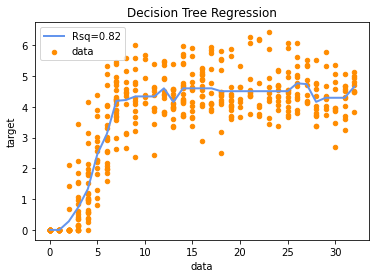

In [219]:
plt.figure()
plt.scatter(df1dum[['Images']].to_numpy(),df1dum[['Lograte']].to_numpy(), s=20, edgecolor=None,
            c="darkorange", label="data")
plt.plot(inp3, y9, color="cornflowerblue",label="Rsq=0.82",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
"""
plt.figure()
plt.scatter(df1dum[['Images']].to_numpy(),df1dum[['Lograte']].to_numpy(), s=20, edgecolor=None,
            c="darkorange", label="data")
plt.plot(inp3, y8, color="cornflowerblue",label="Rsq=0.82",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("OLS Regression")
plt.legend()
plt.show()
"""

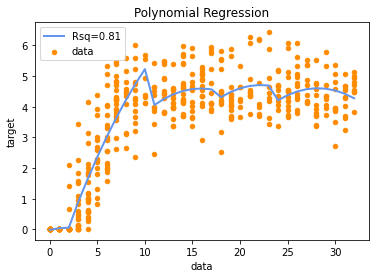

In [191]:
plt.figure()
plt.scatter(df1dum[['Images']].to_numpy(),df1dum[['Lograte']].to_numpy(), s=20, edgecolor=None,
            c="darkorange", label="data")
plt.plot(inp3, y8, color="cornflowerblue",label="Rsq=0.81",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

<H1> 2nd and 3rd Datasets

In [127]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb/Open_Listings.csv')

In [128]:
df2.head(10)

,Date,Open_Listings_0_2,Open_Listings_3_5,Open_Listings_6_10,Open_Listings_11_15,Open_Listings_16
0,08/01/2018,51918,59583,9558,28830,38364
1,08/02/2018,50196,67897,10820,23024,31676
2,08/03/2018,56239,52148,24258,34328,7342
3,08/04/2018,57762,67057,15148,15531,23232
4,08/05/2018,59221,53113,18165,18387,8486
5,08/06/2018,51043,66962,18485,20555,27451
6,08/07/2018,51408,67209,9978,5250,14283
7,08/08/2018,56677,61590,13495,13531,38859
8,08/09/2018,57704,66742,25888,30466,35611
9,08/10/2018,52860,56609,9717,30089,13067


In [129]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb/Redundant_Listings.csv')

In [132]:
df3 = df3.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

In [133]:
df3.head(10)

,Property_Images,Total_Listings,Redundant_Listings
0,0 to 2,"563,246","428,368"
1,3 to 5,"716,923","264,321"
2,6 to 10,"1,341,164","98,874"
3,11 to 15,"993,269","53,292"
4,15 to 20,"873,269","61,382"
5,21 to 25,"635,481","29,285"
6,26 to 30,"498,456","42,473"
7,> 30,"384,875","28,274"
